### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons_processed.csv` file.




In [2]:
data = pd.read_csv('data/coupons_processed.csv')

In [3]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12596 entries, 0 to 12595
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12596 non-null  object
 1   passanger             12596 non-null  object
 2   weather               12596 non-null  object
 3   temperature           12596 non-null  int64 
 4   time                  12596 non-null  object
 5   coupon                12596 non-null  object
 6   expiration            12596 non-null  object
 7   gender                12596 non-null  object
 8   age                   12596 non-null  object
 9   maritalStatus         12596 non-null  object
 10  has_children          12596 non-null  int64 
 11  education             12596 non-null  object
 12  occupation            12596 non-null  object
 13  income                12596 non-null  object
 14  Bar                   12596 non-null  object
 15  CoffeeHouse           12596 non-null

2. Investigate the dataset for missing or problematic data.

There are many columns has nulls value, to name car,bar,CoffeeHouse, CarryAway,RestaurantLessThan20 and Restaurant20To50.

Some of these features(columns) are very important to answer the question of 'will customer accepts the coupon'

`All the data cleanup has been done in this [data_cleanup.ipynb](./data_cleanup.ipynb)`

3. Decide what to do about your missing data -- drop, replace, other...

   `All the data cleanup has been done in this [data_cleanup.ipynb](./data_cleanup.ipynb). See there for details`

4. What proportion of the total observations chose to accept the coupon? 



In [30]:
# The following method value_counts() tells that how many people accepted the coupon and how many didnt
# 56.73% of the population accepted the coupons
round(data[data['coupon_accepted'] == 1]['coupon_accepted'].value_counts()/data.shape[0]*100,2)

1    56.73
Name: coupon_accepted, dtype: float64

#### Coupons Accepted Pie Plot
The following pie plot tells us that **56.7%** people accepted the coupon and rest dont

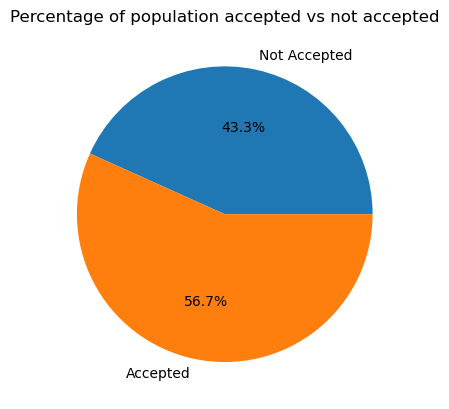

In [86]:
# Setting the title for the plot
plt.title('Percentage of population accepted vs not accepted')

# grouping the data based on whether the coupon is accepted to not
coupon_accepted_df = data.groupby('coupon_accepted').size()

#creating a pie plot using labels as 'Not Accepted','Accepted'
plt.pie(coupon_accepted_df, labels=['Not Accepted','Accepted'],autopct='%1.1f%%')
plt.show()

Now lets see how the accepted population is distributed along with 'maritalStatus' feature. This will help us understand what marital status is driving more coupons acceptance.

The following pie plot clearly tells that **single and married** people are always looking to coupons

maritalStatus
Divorced              269
Married partner      2749
Single               2840
Unmarried partner    1226
Widowed                62
dtype: int64


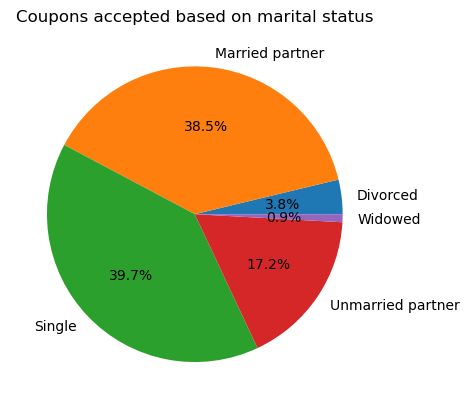

In [99]:
#filter by accepted people and then groupby marital status
accepted_by_marital_status_df = data.query("coupon_accepted == 1").groupby('maritalStatus').size()

plt.title("Coupons accepted based on marital status")
plt.pie(accepted_by_marital_status_df, labels=accepted_by_marital_status_df.index,autopct='%1.1f%%')
plt.show()

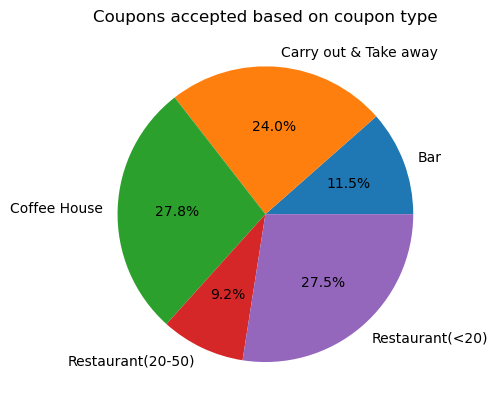

In [116]:
accepted_by_marital_status_df = data.query("coupon_accepted == 1").groupby('coupon').size()

plt.title("Coupons accepted based on coupon type")
plt.pie(accepted_by_marital_status_df, labels=accepted_by_marital_status_df.index,autopct='%1.1f%%')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

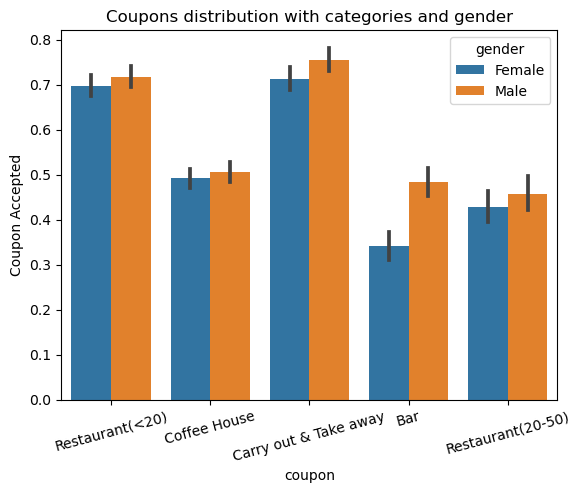

In [113]:
plt.title("Coupons distribution with categories and gender")
sns.barplot(data,x ='coupon', y = 'coupon_accepted', hue='gender')
plt.ylabel("Coupon Accepted")
plt.xticks(rotation=15)
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

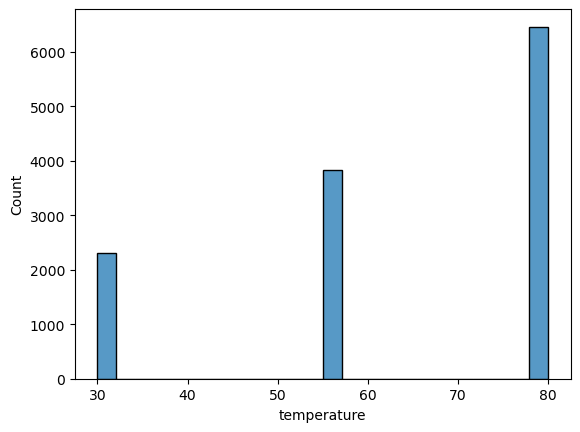

In [114]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  